<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedHyperParameterOptimisation/blob/CrossValidation/GroupedClossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grouped Cross Validation are used when the data in the following states

1. Time Series
2. Samples came from the same/same group of objects
3. when the data is not iid.

There are three ways in sklearn

1. Grouped K Fold
2. Leave one group out
3. Leave p Group out

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [5]:
df['target'] = data.target

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

For the demosnstration pupose, we are creating the a patient list randomly

In [9]:
# creating a list of id's from zero to 9
patient_list = [a for a in range(0,10)]
patient_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
np.random.choice(patient_list, len(df))

array([8, 4, 9, 1, 1, 1, 6, 1, 7, 5, 6, 0, 5, 8, 0, 3, 0, 0, 0, 3, 4, 7,
       1, 9, 2, 3, 1, 5, 1, 4, 6, 3, 9, 9, 0, 9, 9, 3, 3, 9, 8, 3, 9, 7,
       0, 7, 0, 6, 5, 2, 6, 1, 1, 5, 7, 1, 8, 3, 4, 4, 9, 3, 9, 3, 8, 4,
       7, 1, 3, 7, 6, 8, 9, 3, 1, 2, 8, 8, 1, 8, 4, 2, 4, 6, 3, 7, 7, 9,
       9, 9, 2, 4, 6, 9, 7, 3, 2, 2, 6, 0, 0, 3, 2, 5, 7, 8, 1, 0, 8, 0,
       9, 4, 1, 6, 0, 0, 2, 9, 5, 6, 6, 7, 7, 7, 8, 0, 0, 8, 7, 6, 0, 2,
       0, 1, 6, 9, 1, 1, 5, 3, 2, 7, 5, 4, 2, 7, 6, 4, 7, 4, 2, 8, 6, 0,
       8, 6, 1, 3, 4, 2, 6, 1, 1, 3, 3, 9, 0, 9, 3, 4, 4, 5, 7, 8, 2, 6,
       8, 4, 9, 9, 2, 3, 5, 5, 1, 3, 9, 2, 8, 4, 9, 5, 7, 3, 3, 2, 2, 0,
       4, 2, 8, 3, 2, 6, 1, 0, 6, 0, 8, 6, 3, 7, 8, 2, 9, 8, 5, 2, 2, 8,
       3, 3, 2, 9, 2, 9, 7, 3, 2, 6, 3, 2, 7, 7, 0, 7, 1, 0, 3, 9, 2, 6,
       0, 3, 4, 4, 2, 2, 6, 0, 8, 7, 7, 6, 7, 2, 4, 8, 9, 7, 4, 2, 4, 0,
       1, 9, 1, 3, 1, 7, 3, 2, 6, 3, 8, 2, 8, 0, 0, 3, 7, 6, 3, 3, 5, 3,
       9, 0, 2, 7, 9, 2, 2, 5, 2, 4, 5, 3, 9, 2, 7,

In [13]:
df['patient'] = np.random.choice(patient_list, len(df))

In [14]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
patient                    0
dtype: int64

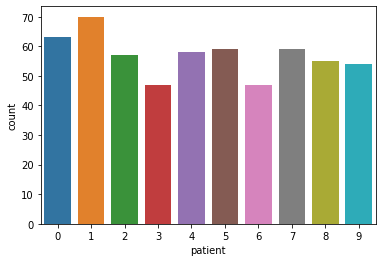

In [16]:
sns.countplot(df['patient'])
plt.show()

In [17]:
df['target'].value_counts(normalize = True)

1    0.627417
0    0.372583
Name: target, dtype: float64

In [18]:
X = df.drop('target', axis = 1)
y = df['target']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100, stratify = y)

In [21]:
from sklearn.linear_model import LogisticRegression

### Using the GridSearch CV - GroupdKFold Cross Validation

In [22]:
from sklearn.model_selection import GridSearchCV

In [24]:
logit = LogisticRegression(max_iter = 10000,random_state =100, solver='liblinear')

In [23]:
from sklearn.model_selection import GroupKFold

In [25]:
gkd = GroupKFold(n_splits = 5)

In [27]:
params = {'penalty' : ['l1','l2'], # penalty startegy
          'C':[0.1,1,10]} # aplpha for penalty

In [30]:
search = GridSearchCV(estimator = logit,
                      param_grid = params,
                      cv = gkd.split(X_train.drop('patient',axis =1), y_train,groups = X_train['patient']),
                      n_jobs = -1,
                      scoring = 'accuracy',
                      verbose = 1,
                      return_train_score= True)

In [31]:
search.fit(X_train.drop('patient', axis = 1),y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f87a6493ba0>,
             estimator=LogisticRegression(max_iter=10000, random_state=100,
                                          solver='liblinear'),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [32]:
search.best_params_

{'C': 10, 'penalty': 'l1'}

In [34]:
best_model = search.best_estimator_
best_model

LogisticRegression(C=10, max_iter=10000, penalty='l1', random_state=100,
                   solver='liblinear')

In [35]:
pd.DataFrame(search.cv_results_).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       6 non-null      float64
 1   std_fit_time        6 non-null      float64
 2   mean_score_time     6 non-null      float64
 3   std_score_time      6 non-null      float64
 4   param_C             6 non-null      object 
 5   param_penalty       6 non-null      object 
 6   params              6 non-null      object 
 7   split0_test_score   6 non-null      float64
 8   split1_test_score   6 non-null      float64
 9   split2_test_score   6 non-null      float64
 10  split3_test_score   6 non-null      float64
 11  split4_test_score   6 non-null      float64
 12  mean_test_score     6 non-null      float64
 13  std_test_score      6 non-null      float64
 14  rank_test_score     6 non-null      int32  
 15  split0_train_score  6 non-null      float64
 16  split1_train

In [36]:
result_cols = ['rank_test_score','params','mean_test_score','std_test_score']

In [37]:
results = pd.DataFrame(search.cv_results_)[result_cols].sort_values(by = 'rank_test_score', ascending = True).set_index('rank_test_score')

In [38]:
results

,params,mean_test_score,std_test_score
rank_test_score,,,
1,"{'C': 10, 'penalty': 'l1'}",0.959622,0.020993
2,"{'C': 1, 'penalty': 'l1'}",0.954936,0.012181
3,"{'C': 10, 'penalty': 'l2'}",0.952371,0.018437
4,"{'C': 1, 'penalty': 'l2'}",0.947243,0.009387
5,"{'C': 0.1, 'penalty': 'l2'}",0.937171,0.013839
6,"{'C': 0.1, 'penalty': 'l1'}",0.929352,0.018368


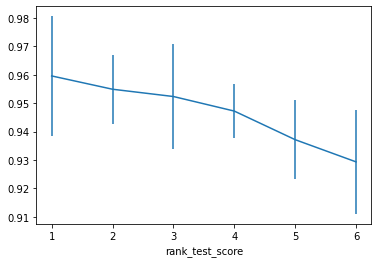

In [41]:
results['mean_test_score'].plot(yerr = [results['std_test_score']])
plt.show()

In [48]:
best_model.predict(X_train.drop('patient', axis = 1))

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [49]:
best_model.predict(X_test.drop('patient', axis = 1))

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
print('accuracy_train :',accuracy_score(y_train,best_model.predict(X_train.drop('patient', axis = 1))))
print('accuracy_test :',accuracy_score(y_test,best_model.predict(X_test.drop('patient', axis = 1))))

accuracy_train : 0.9849246231155779
accuracy_test : 0.9473684210526315


Approach is very similat to 

1. Leave one group out cross validation
2. Leave P group out cross validation